<a href="https://colab.research.google.com/github/JenAM06/Food-Delivery-Time-Prediction/blob/main/Minpro3_Jen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File Visualisasi
pada tahap visualisasi ini, file yang digunakan adalah file yang sudah melalui tahap data preparation. menggunakan:

output_path ="/content/drive/MyDrive/AVD/Food_Delivery_Times_clean.csv"

df.to_csv(output_path, index=False)

Jadi nama file yang digunakan adalah Food_Delivery_Times_clean.csv

# DESKRIPSI KOLOM
1. **Weather**: "Clear": 0, "Windy": 1, "Foggy": 2, "Rainy": 3, "Snowy": 4

2. **Time_of_Day**: "Morning": 0, "Afternoon": 1, "Evening": 2, "Night": 3

3. **Traffic_Level**: "Low": 0, "Medium": 1, "High": 2

4. **Vehicle_Type**: Scooter": 0, "Bike": 1, "Car": 2

# DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/AVD/Food_Delivery_Times_clean.csv")

df

Mounted at /content/drive


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Relative_Delivery_Time
0,7.93,1,0,1,0,12,1.0,43,3.307692
1,16.42,0,1,2,1,20,2.0,84,4.000000
2,9.52,2,0,3,0,28,1.0,59,2.034483
3,7.44,3,1,1,0,5,1.0,37,6.166667
4,19.03,0,0,0,1,16,5.0,68,4.000000
...,...,...,...,...,...,...,...,...,...
995,8.50,0,2,2,2,13,3.0,54,3.857143
996,16.28,3,0,0,0,8,9.0,71,7.888889
997,15.62,4,2,2,0,26,2.0,81,3.000000
998,14.17,0,0,1,1,8,0.0,55,6.111111


# Visualisasi Analitik deskriptif
Menyediakan gambaran tentang apa yang telah terjadi di masa lalu. Ini melibatkan pengumpulan dan pengorganisasian data untuk memberikan laporan yang jelas dan ringkas.


## Heatmap Antar Fitur (Kolom)

Heatmap antar fitur digunakan untuk memvisualisasikan korelasi dalam dataset. Ini membantu mengidentifikasi hubungan antar variabel, menemukan pola, mendeteksi redundansi data, dan mendukung pengambilan keputusan

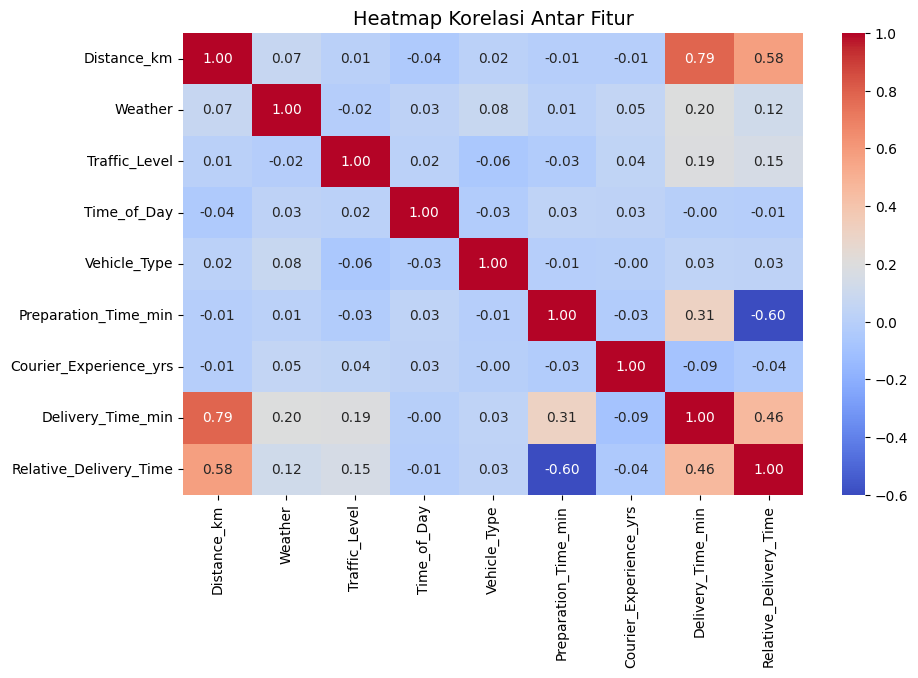

In [ ]:
df_corr = df[['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
              'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
              'Delivery_Time_min', 'Relative_Delivery_Time']]

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14)
plt.show()


**Hasil Analisis**

1. Terdapat **kesalahan logika** pada  kolom Relative_Delivery_Time karena menunjukkan Korelasi negatif (-0.60). Menunjukkan bahwa semakin lama waktu persiapan, semakin rendah nilai Relative_Delivery_Time yang berarti kecepatan dalam persiapan dan pengiriman juga cepat. Kesimpulannya kolom Relative_Delivery_Time tidak akan dipakai.
2. Jarak Pengiriman (Distance_km) dan Waktu Pengiriman (Delivery_Time_min) memiliki  korelasi sebesar 0,79. Ini berarti semakin jauh jarak pengiriman, semakin lama waktu yang dibutuhkan untuk pengiriman. Hal ini bisa menjadi insight untuk memperkirakan waktu pengiriman berdasarkan jarak.
3. Waktu Persiapan (Preparation_Time_min) memiliki korelasi 0,31 dengan Waktu Pengiriman (Delivery_Time_min). Semakin lama waktu persiapan, semakin besar kemungkinan pengiriman juga memakan waktu lebih lama walaupun pengaruhnya lebih kecil dibandingkan dengan fakto jarak.
4. Cuaca (Weather)memiliki korelasi 0,20 dan tingkat kemacetan 0,19 terhadap waktu pengiriman, yang menunjukkan bahwa faktor-faktor ini memiliki pengaruh, tetapi tidak terlalu signifikan.
5. Tipe Kendaraan (Vehicle_Type) memiliki korelasi sangat rendah terhadap Waktu Pengiriman (Delivery_Time_min), yaitu sekitar 0,03.Menunjukkan bahwa jenis kendaraan yang digunakan tidak memiliki dampak signifikan terhadap durasi pengiriman namun bisa dipertimbangkan jika dipengaruhi oleh faktor cuaca.
6. Waktu pengantaran (Time_of_Day) tidak memiliki korelasi dengan waktu pengiriman, tetapi perusahaan dapat menganalisis waktu yang memiliki kemacetan tertinggi.
7. Pengalaman kurir mencapai angka minus menunjukkan bahwa pengalaman kurir tidak terlalu berperan dalam mempercepat atau memperlambat pengiriman walaupun memiliki sedikit korelasi dengan cuaca (Weather) atau kemacetan (Traffic Level).

**Kesimpulan Analisis**
1. Waktu Pengiriman (Delivery_Time_min) adalah fokus analisis untuk meningkatkan kepuasan pelanggan
2.  Jarak pengiriman merupakan faktor utama dalam menentukan waktu pengiriman.
3. Perusahaan dapat meningkatkan kecepatan pengiriman dengan fokus pada mempercepat waktu persiapan.
4. memanfaatkan informasi lalu lintas dan cuaca guna mengurangi ketidakpastian dalam estimasi waktu pengiriman dengan memilih kendaraan yang cocok.

## Distribusi Waktu Pengantaran Makanan

Fungsi distribusi menggambarkan pola sebaran waktu pengiriman makanan.

In [ ]:
rata = df['Delivery_Time_min'].mean()
print("Rata-rata Waktu Pengiriman:", rata, "menit")

Rata-rata Waktu Pengiriman: 56.622 menit


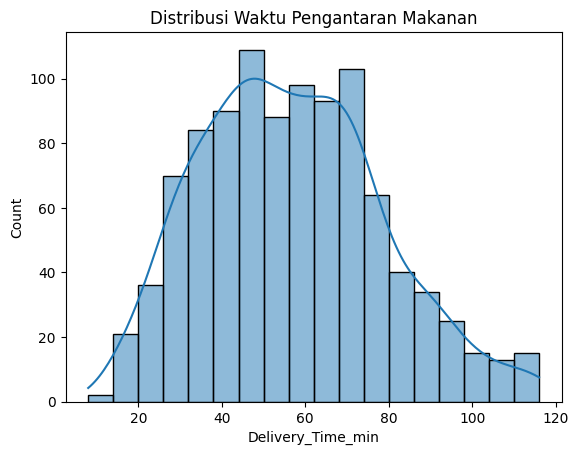

In [ ]:
sns.histplot(df['Delivery_Time_min'], kde=True)
plt.title("Distribusi Waktu Pengantaran Makanan")
plt.show()

***Insight***

1. Distribusi menunjukkan bahwa sebagian besar pengiriman selesai dalam rentang 40-60 menit, yang menjadi waktu standar untuk pengiriman makanan karena pola hampir simetris dengan puncak pada rentang 40-60 menit. Rentang ini bisa dijadikan target atau benchmark perusahaan untuk meningkatkan efesiensi.
2. Rata-rata pengiriman terjadi dalam rentang 50-70 menit, dengan sedikit fluktuasi. Perusahaan bisa berusaha mengoptimalkan waktu pengiriman agar lebih dekat ke batas bawah (dibawah 50 menit).
3. Beberapa pengiriman membutuhkan lebih dari 100 menit, yang kemungkinan dibutuhkan analisis lebih lanjut tentang faktor keterlambatannya pengiriman makanan.

# Visualisasi Analitik DIAGNOSTIK
Mencari tahu alasan di balik peristiwa tertentu yang terjadi, biasanya dengan mencari hubungan sebab-akibat.


## Faktor Keterlambatan


<ipython-input-36-5f8d1875e5da>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_delivery.values, y=corr_with_delivery.index, palette='coolwarm')


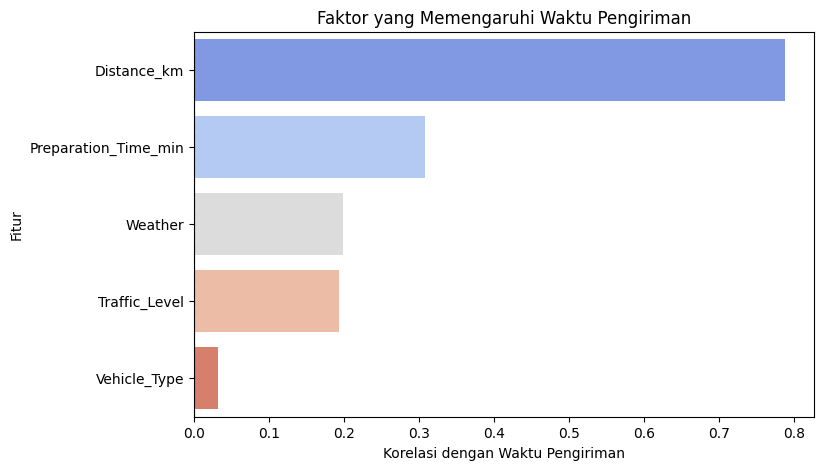

In [ ]:
corr_with_delivery = df.corr()['Delivery_Time_min'].drop(['Delivery_Time_min', 'Courier_Experience_yrs', 'Relative_Delivery_Time', 'Time_of_Day'], errors='ignore').sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_delivery.values, y=corr_with_delivery.index, palette='coolwarm')
plt.xlabel('Korelasi dengan Waktu Pengiriman')
plt.ylabel('Fitur')
plt.title('Faktor yang Memengaruhi Waktu Pengiriman')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

**Insight**

1. Visualisasi berdasarkan korelasi dari heatmap sebelumnya, grafik hanya menampilkan fitur dengan angka positif.

2. Faktor Utama yang memengaruhi waktu pengiriman adalah jarak pengiriman (Distance_km). Perusahaan dapat membuat analisis untuk memprediksi waktu estimasi berdasarkan jaraknya.

3. Waktu persiapan makanan juga berkontribusi terhadap total waktu pengiriman.

4. Dampak Lalu Lintas dan Cuaca dapat memengaruhi waktu pengiriman.

5. Peran Jenis Kendaraan (Vehicle_Type) tidak terlalu berpengaruh terhadap durasi pengiriman. Namun, akan dilakukan analisis lebih lanjut pengaruh kendaraan yang dipakai kurir pada cuaca atau tingkat kepadatan lalu lintas yang berbeda.

# Visualisasi Analitik Prediktif
Teknik analisis prediktif menggunakan data historis untuk mengidentifikasi tren dan menentukan apakah tren tersebut akan berulang, memberikan insight tentang apa yang mungkin terjadi di masa depan.

## Prediksi Waktu Pengiriman Berdasarkan Jarak

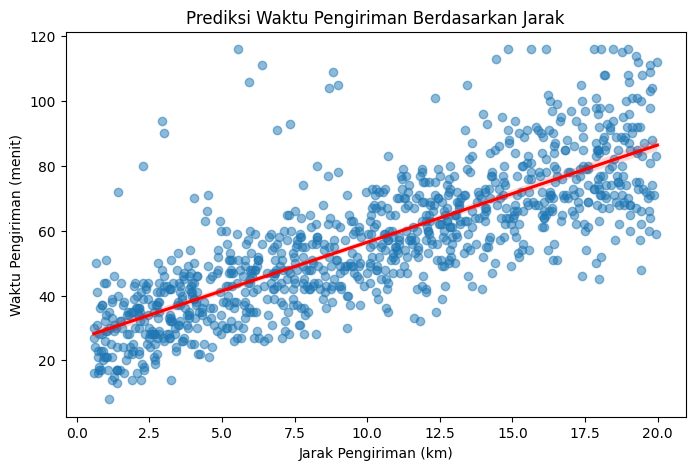

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Distance_km'], y=df['Delivery_Time_min'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Judul dan label
plt.title('Prediksi Waktu Pengiriman Berdasarkan Jarak')
plt.xlabel('Jarak Pengiriman (km)')
plt.ylabel('Waktu Pengiriman (menit)')

plt.show()

***Insight***

1. Meskipun ada beberapa titik yang lebih tersebar, tren menunjukkan bahwa semakin jauh jaraknya, semakin lama waktu pengirimannya. Hal ini konsisten dengan analisis sebelumnya bahwa jarak berkontribusi besar terhadap waktu pengiriman.
2. Pada jarak pendek (kurang dari 5 km), terdapat lebih banyak fluktuasi dalam waktu pengiriman. Hal ini bisa disebabkan oleh faktor lain seperti kondisi lalu lintas atau cuaca.
3. Pada jarak lebih jauh (di atas 10 km), waktu pengiriman tampak lebih konsisten, meskipun ada beberapa titik yang sedikit lebih tinggi. Ini menunjukkan bahwa pengiriman jarak jauh relatif lebih dapat diprediksi, meskipun kondisi eksternal masih bisa memengaruhinya.

**Perkiraan Waktu Pengiriman**

*   <5 km = ± 25 menit
*   5 km = ± 35 menit
*   10 km = ± 55 menit
*   15 km = ± 75 menit
*   20 km = ± 95 menit

**Strategi**
1. Kelompokkan pesanan berdasarkan lokasi pengiriman yang berdekatan untuk mengurangi jarak tempuh total.
2. Untuk jarak pengiriman yang pendek (misalnya, di bawah 5 km), perusahaan dapat menambahkan fitur expres dengan memprioritaskan pesanan pelanggan pada bagian persiapan makanan (Preparation_Time_min) sehingga faktor keterlambatan selain jarak dapat ditangani.
3. Menawarkan opsi pengiriman ekonomis dengan waktu yang lebih lama, jadi pelanggan dapat menerima lamanya waktu kedatangan karena sudah membayar dengan harga lebih rendah.

## Rata-Rata Waktu Pengiriman Berdasarkan Waktu Persiapan

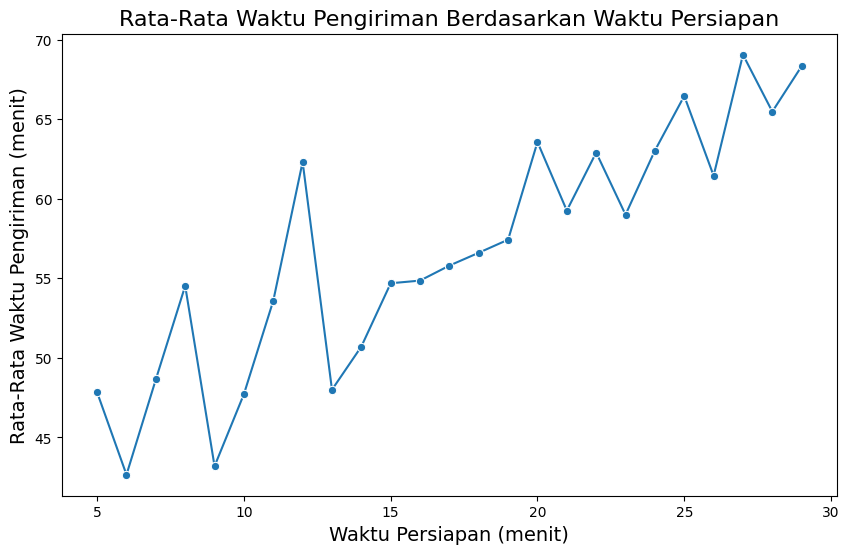

In [ ]:
grouped_data = df.groupby('Preparation_Time_min')['Delivery_Time_min'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Preparation_Time_min', y='Delivery_Time_min', data=grouped_data, marker='o')

plt.title('Rata-Rata Waktu Pengiriman Berdasarkan Waktu Persiapan', fontsize=16)
plt.xlabel('Waktu Persiapan (menit)', fontsize=14)
plt.ylabel('Rata-Rata Waktu Pengiriman (menit)', fontsize=14)

# Menampilkan plot
plt.show()

***Insight***
1. Grafik menunjukkan bahwa semakin lama waktu persiapan, semakin tinggi rata-rata waktu pengiriman.
2. Pada waktu persiapan di bawah 10 menit, terdapat fluktuasi yang cukup signifikan dalam waktu pengiriman. Hal ini mungkin disebabkan oleh faktor lain.
3. Setelah 10 menit, terdapat tren peningkatan yang lebih stabil antara waktu persiapan dan waktu pengiriman. Ini menunjukkan bahwa pesanan dengan waktu persiapan lebih lama cenderung memiliki waktu pengiriman yang juga lebih lama.
4. terlalu banyak fluktuasi sehingga kurang stabil sebagai prediksi.

**Strategi**
1. Perusahaan dapat membuat dua estimasi yang berbeda, yaitu estimasi saat makanan disiapkan dan estimasi pengantaran sampai pada lokasi pelanggan. Dengan estimasi yang berbeda, perusahaan dapat mengetahui faktor keterlambatan berasal dari kurir atau restoran yang dipesan.
2. Manajemen dapur yang lebih efisien.
3. Gunakan data real-time untuk memantau waktu persiapan dan mengidentifikasi area yang perlu ditingkatkan.

## Perkiraan Faktor Cuaca

In [ ]:
df.groupby('Weather')['Delivery_Time_min'].mean().reset_index()

,Weather,Delivery_Time_min
0,0,53.012000
1,1,55.395833
2,2,59.466019
3,3,59.622549
4,4,67.113402


<ipython-input-101-2f7b9a29e6e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_avg['Weather'], y=weather_avg['Delivery_Time_min'], palette='coolwarm')


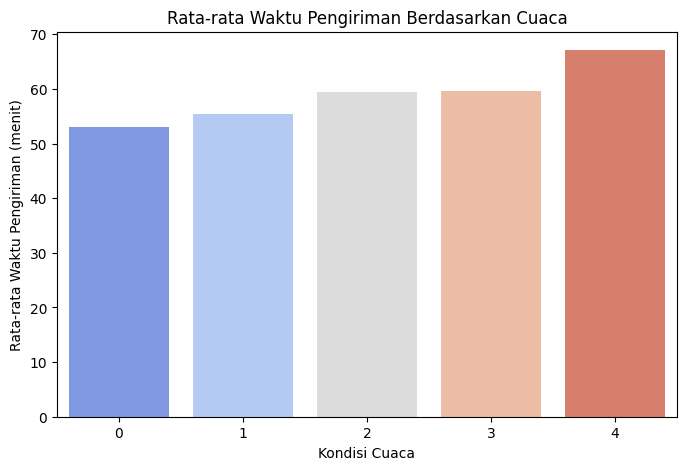

In [ ]:
weather_avg = df.groupby('Weather')['Delivery_Time_min'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_avg['Weather'], y=weather_avg['Delivery_Time_min'], palette='coolwarm')

plt.title('Rata-rata Waktu Pengiriman Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Waktu Pengiriman (menit)')
plt.show()

***Insight***

1. Grafik menunjukkan bahwa semakin buruk cuaca, semakin lama waktu pengiriman.
2. Dalam kondisi cerah (Clear - 0) dan berangin (Windy - 1), waktu pengiriman lebih singkat dan stabil.
3. Pada kondisi berkabut (Foggy - 2) dan hujan (Rainy - 3), rata-rata waktu pengiriman meningkat, kemungkinan akibat visibilitas rendah dan jalan licin.
4, Salju (Snowy - 4) memiliki dampak terbesar terhadap keterlambatan pengiriman, menunjukkan bahwa cuaca buruk menyebabkan waktu pengiriman paling lama.

**Strategi**
1. Melakukan analisis kembali mengenai hubungan cuaca dengan kendaraan yang digunakan kurir.
2. Memberikan notifikasi bahwa terjadi keterlambatan karena cuaca hujan agar pelanggan tidak merasakan hal yang tidak pasti karena estimasi pengantaran terlewat.
3. Meningkatkan teknologi dengan menggunakan data real time agar dapat memprediksi cuaca pada hari tersebut sehingga estimasi pengantaran lebih akurat.

### Delivery Time berdasarkan Vehicle Type dan Cuaca

In [ ]:
df.groupby(['Vehicle_Type', 'Weather'])['Delivery_Time_min'].agg(['mean', 'count']).reset_index()

,Vehicle_Type,Weather,mean,count
0,0,0,52.475904,166
1,0,1,56.434783,23
2,0,2,54.516129,31
3,0,3,61.403226,62
4,0,4,68.800000,20
5,1,0,52.056452,248
6,1,1,56.924528,53
7,1,2,60.807692,52
8,1,3,60.346939,98
9,1,4,65.826923,52


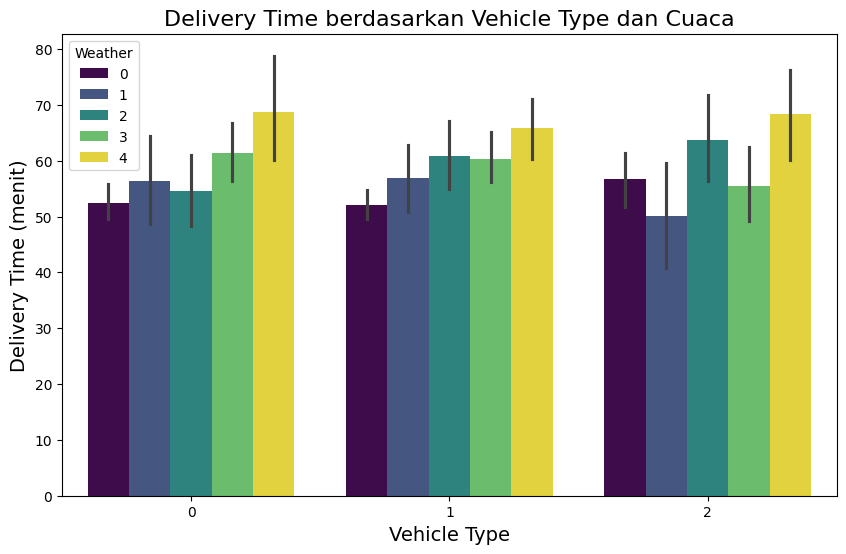

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', hue='Weather', data=df, palette='viridis')

plt.title('Delivery Time berdasarkan Vehicle Type dan Cuaca', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Delivery Time (menit)', fontsize=14)
plt.legend(title='Weather')

plt.show()

***Insight***

**Penggunaan Kendaraan**

1. Pada kondisi cuaca cerah (Clear), perbedaan waktu pengiriman antar kendaraan tidak terlalu jauh berbeda. Namun, ketika cuaca memburuk (*Rainy*), *scooter* (0) dan *bike* (1) cenderung memiliki peningkatan waktu yang lebih lama dibandingkan *car* (2).
2. Cuaca yang lebih ekstrem (Snowy - 4), meningkatkan waktu pengiriman secara signifikan untuk semua jenis kendaraan.
3. Ada  kemungkinan beberapa rute sulit dilewati saat kondisi buruk sehingga kurir perlu mencari rute lain.
4. Jumlah kurir yang bekerja pada hari cerah sangat banyak. Ini bisa menyebabkan aplikasi kesulitan mencari kurir yang lebih dekat dengan restoran saat kondisi cuaca buruk.

**Strategi**

1. Aplikasi *delivery* dapat membuat konfirmasi lebih lanjut bahwa jika pelanggan memilih *order* menggunakan roda 2 saat cuaca sedang hujan, maka etimasi tiba akan lebih lama dari perkiraan berdasarkan jarak dan merekomendasikan menggunakan mobil.
2. Menyesuaikan rute pengiriman berdasarkan jenis kendaraan dan kondisi cuaca untuk meminimalkan waktu tempuh.
3. Memadai perlengkapan kurir agar kurir tidak hanya berkerja pada cuaca cerah.

## Perkiraan Faktor Lalu Lintas (kemacetan)

Semakin tinggi tingkat kemacetan (Traffic Level), semakin lama waktu pengiriman.


### Rata-rata Waktu Pengiriman Berdasarkan Tingkat Lalu Lintas

In [ ]:
df.groupby('Traffic_Level')['Delivery_Time_min'].mean().reset_index()

,Traffic_Level,Delivery_Time_min
0,0,52.728460
1,1,56.347619
2,2,64.776650


<ipython-input-103-88dfc2d7c7de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=traffic_avg, palette='coolwarm')


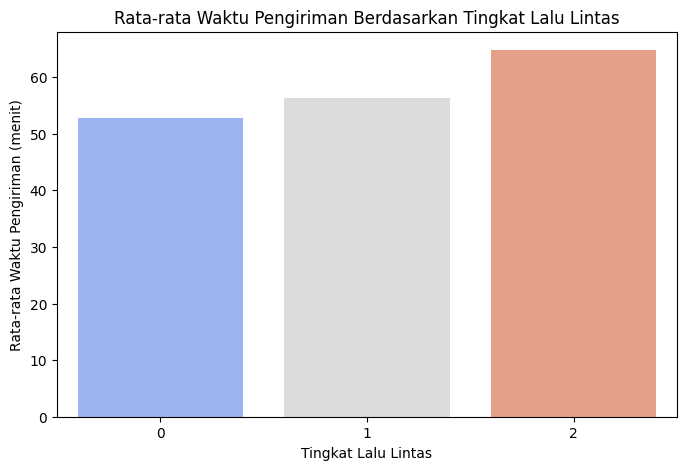

In [ ]:
traffic_avg = df.groupby('Traffic_Level')['Delivery_Time_min'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=traffic_avg, palette='coolwarm')

plt.title('Rata-rata Waktu Pengiriman Berdasarkan Tingkat Lalu Lintas')
plt.xlabel('Tingkat Lalu Lintas')
plt.ylabel('Rata-rata Waktu Pengiriman (menit)')

plt.show()

***Insight***

1. Pada tingkat lalu lintas 0 (rendah), waktu pengiriman rata-rata sekitar 52 menit.
2. Pada tingkat lalu lintas 1 (sedang), waktu pengiriman meningkat menjadi 56 menit, menunjukkan bahwa kepadatan lalu lintas mulai memengaruhi kecepatan pengiriman.
3. Pada tingkat lalu lintas 2 (tinggi), waktu pengiriman melonjak hingga 64 menit, menandakan bahwa kemacetan sangat berdampak pada efisiensi pengiriman.

**Strategi**
1. Melakukan analisis lebih lanjut tentang apakah kendaraan yang digunakan kurir memengaruhi keterlambatan pengiriman saat lalu lintas sedang padat.
2. Melakukan analisis lebih lanjut untuk mengetahui kapan waktu terjadinya kepadatan lalu lintas yang menyebabkan keterlambatan pengiriman.

### Delivery Time berdasarkan Vehicle Type dan Traffic Level

In [ ]:
df.groupby(['Vehicle_Type', 'Traffic_Level'])['Delivery_Time_min'].agg(['mean', 'count']).reset_index()

,Vehicle_Type,Traffic_Level,mean,count
0,0,0,48.764706,102
1,0,1,57.014388,139
2,0,2,65.295082,61
3,1,0,53.716495,194
4,1,1,55.822967,209
5,1,2,63.380000,100
6,2,0,55.172414,87
7,2,1,56.583333,72
8,2,2,67.777778,36


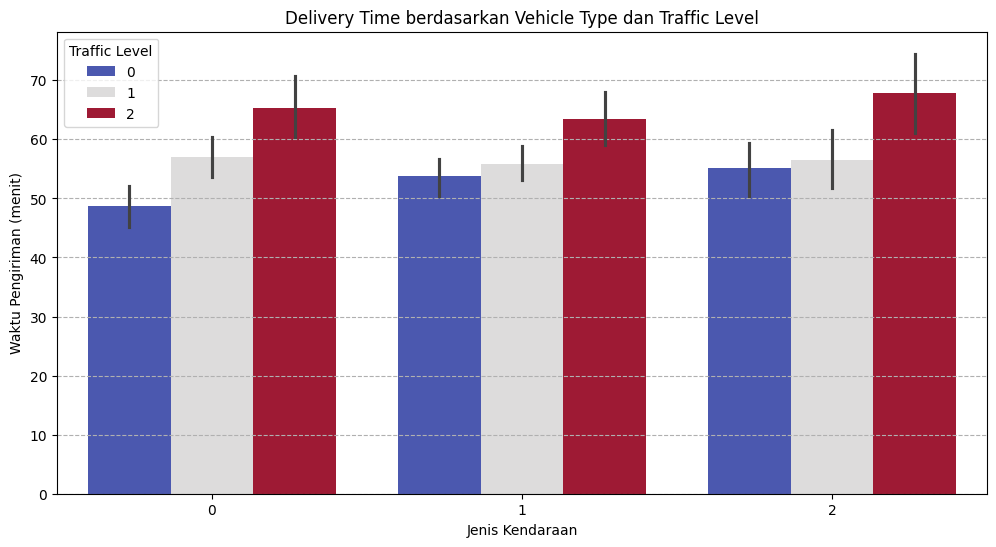

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', hue='Traffic_Level', data=df, palette='coolwarm', dodge=True)

plt.title('Delivery Time berdasarkan Vehicle Type dan Traffic Level')
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Waktu Pengiriman (menit)')
plt.legend(title='Traffic Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

***Insight***
1. Semakin tinggi tingkat lalu lintas, semakin lama waktu pengiriman, terlepas dari jenis kendaraan yang digunakan.
2. Pada tingkat lalu lintas 0 (rendah), waktu pengiriman rata-rata berkisar antara 48–55 menit, tergantung jenis kendaraan.
3. Pada tingkat lalu lintas 1 (sedang), terjadi peningkatan waktu pengiriman di semua jenis kendaraan, sekitar 55–57 menit.
Pada tingkat lalu lintas 2 (tinggi), waktu pengiriman meningkat lebih signifikan, dengan kendaraan tertentu mencapai lebih dari 70 menit.
Kendaraan
4. jenis kendaraan roda 2 memiliki waktu pengiriman tertinggi terutama *scooter* (1).

**Strategi**
1. Pastikan kurir memahami rute alternatif dan cara menghindari kemacetan.
2. Memberikan rekomendasi menggunakan roda 2 saat jam sibuk kepada pelanggan di aplikasi. strategi ini memerlukan analisis lebih lanjut bagaimana mempredikasi kapan akan terjadi kepadatan lalu lintas.
3. Perusahaan dapat mempertimbangkan penggunaan scooter lebih banyak.

### Distribusi Delivery Time

In [3]:
df.groupby(['Time_of_Day', 'Traffic_Level'])['Delivery_Time_min'].agg(['mean', 'count']).reset_index()

,Time_of_Day,Traffic_Level,mean,count
0,0,0,53.140625,128
1,0,1,56.187500,144
2,0,2,65.227273,66
3,1,0,51.016807,119
4,1,1,57.299065,107
5,1,2,64.224138,58
6,2,0,53.963303,109
7,2,1,57.178295,129
8,2,2,64.472727,55
9,3,0,53.333333,27


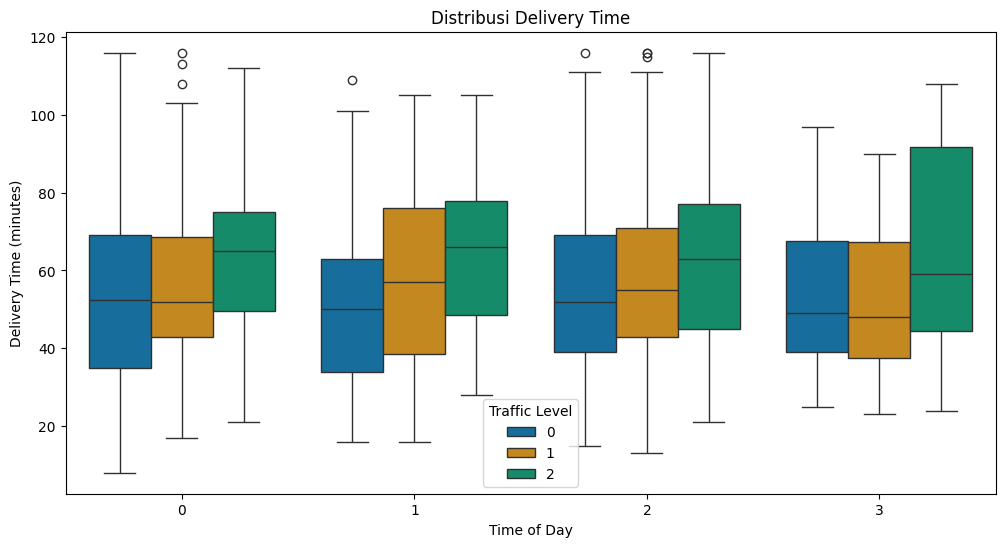

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Time_of_Day", y="Delivery_Time_min", hue="Traffic_Level", data=df, palette="colorblind")
plt.title("Distribusi Delivery Time")
plt.xlabel("Time of Day")
plt.ylabel("Delivery Time (minutes)")
plt.legend(title="Traffic Level")
plt.show()

***Insight***
1. Pada tingkat lalu lintas 0 (rendah), waktu pengiriman rata-rata sekitar 50 menit.
2. Pada tingkat lalu lintas 1 (sedang), waktu pengiriman meningkat menjadi 55-57 menit, menunjukkan bahwa kepadatan lalu lintas mulai memengaruhi kecepatan pengiriman.
3. Pada tingkat lalu lintas 2 (tinggi), waktu pengiriman melonjak hingga lebih dari 65 menit, menandakan bahwa kemacetan memengaruhi efisiensi pengiriman.
4. Pada kemacetan rendah (0), *scooter* memiliki estimasi pengantaran tercepat. Kemungkinan kendaraan roda dua lebih cocok saat lalu lintas sedang senggang.
5. Saat kemacetan tinggi (2), *car*(2) memiliki waktu pengiriman tertinggi, sedangkan *scooter* (0) dan *bike* (1) masih relatif lebih rendah.
6. Pada semua *Time of Day* (0: *Morning*, 1: *Afternoon*, 2: *Evening*, 3: *Night*), tren memperlihatkan bahwa semakin tinggi *traffic*, semakin tinggi waktu pengiriman. Ada beberapa *outlier* di setiap kelompok, menunjukkan bahwa dalam beberapa kasus, pengiriman bisa jauh lebih lama dari rata-rata.

**Strategi**

1. Perusahaan dapat mengoptimalkan rute terutama pada jam sibuk seperti pada malam hari dan dapat memperkirakan jenis kendaraan yang dibutuhkan.
2. Update estimasi pengantaran saat jam sibuk agar tidak mengurangi kepuasan pelanggan.
3. Pastikan kurir memahami rute alternatif dan cara menghindari kemacetan.
4. Memberikan rekomendasi menggunakan roda 2 saat jam sibuk kepada pelanggan di aplikasi.
5. Perusahaan dapat mempertimbangkan penggunaan scooter lebih banyak.
